<a href="https://colab.research.google.com/github/RajuMopidevi/Applied-ML/blob/main/Practical_3_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/Applied_ML/Practical' # Please adjust the path accordingly
    os.chdir(path_to_file)
    !pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Applied_ML/Practical


### 1. Introduction
You are owing a supermarket mall and through membership cards , you have some basic data about your customers, e.g. age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

You want to understand the customers' spending patterns so that can be given to marketing team to plan the strategy accordingly.

### 2. Load Data

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


In [2]:
# Import dataset: Shopping Mall Customers Information
dat = pd.read_csv('https://raw.githubusercontent.com/RajuMopidevi/Applied-ML/main/Practical/Mall_Customers.csv')

In [3]:
# Preview the data: four columns/attributes
dat.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [4]:
# Select Two colulmns: Annual Income & Spending Score
X = dat.iloc[:,[2,3]]
X.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [5]:
# Scaling the data so that all the features/attributes become comparable
X_scaled = (X - X.mean()) / X.std()

### 3. Build and Evaluate the K-means Model

In [6]:
# Build a K-means clustering model
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=1)
# n_clusters: number of clusters
# n_init: Number of time the k-means algorithm will be run with different centroid seeds.
# max_iter: Maximum number of iterations of the k-means algorithm for a single run

In [7]:
# Fit the Model on our dataset
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=20, random_state=1)

In [8]:
# View the Coordinates of cluster centers (i.e. the centroids)
kmeans.cluster_centers_

array([[ 0.98910098,  1.23640011],
       [ 1.00667355, -1.2224677 ],
       [-0.62462222, -0.01435636]])

In [9]:
# Assign each data object/point to the cluster represented by its nearest centroid
y_pred = kmeans.predict(X_scaled)

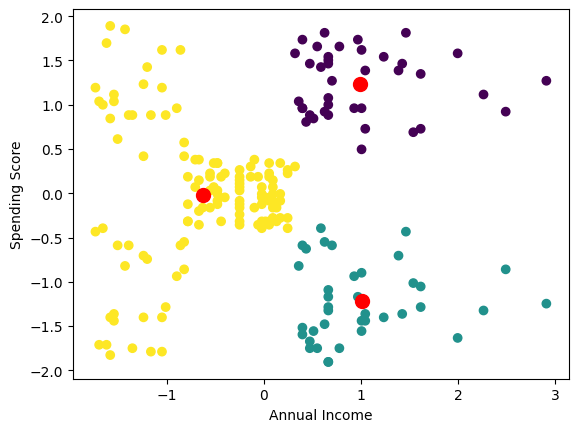

In [10]:
# Visualise the Clusters and their corresponding centroids in the below graph
plt.scatter(X_scaled.iloc[:,0], X_scaled.iloc[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [11]:
# Evalute the model using Sum of Squared Errors (SSE)
kmeans.inertia_

156.9154881096077

### 4. Improve the Model

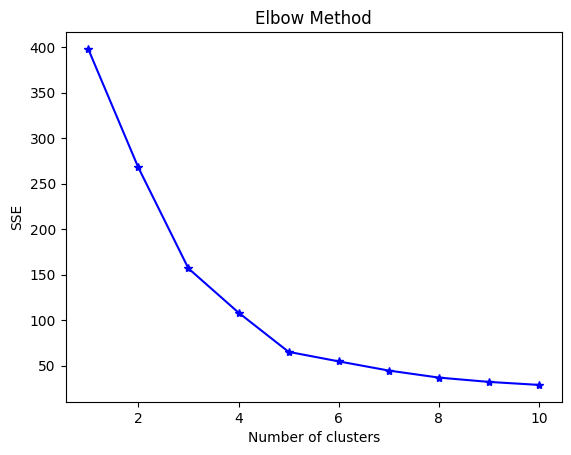

In [12]:
# Find the optimal number of clusters (i.e. K) using elbow method
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse, 'b-*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

From the above graph, we can see K=5 is the optimal number of clusters for this problem.

In [13]:
# Build the model using the optimal n_cluster
kmeans = KMeans(n_clusters=5, n_init=20, random_state=1)
# Fit the model and assign each data point to the cluster
y_pred = kmeans.fit_predict(X_scaled) # fit and then predict

### 5. Visualize the Clusters

* Visualise the Clusters and their corresponding centroids using scatter plot

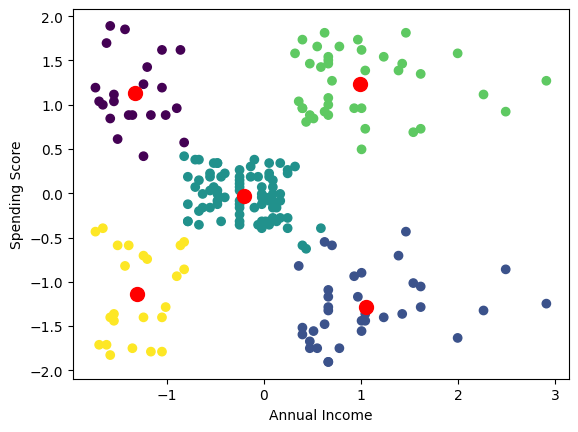

In [14]:
plt.scatter(X_scaled.iloc[:,0], X_scaled.iloc[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### 6. Intepret the Model
This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers based on their Annual Income and Spending Score:  
* Cluster 1: low income but high spending
* Cluster 2: high income but low spending
* Cluster 3: average income and average spending
* Cluster 4: high income and high spending
* Cluster 5: low income and low spending

From marketing perspective, we should try to motive the customers from cluster 2 to spend more and at the same time make sure customers of cluster 4 continue with their current spending patterns.

### 7. Exercise
Use bank dataset (`bank.csv`), randomly select 200 samples and select columns / attributes `age` and `balance` to build K-means clustering model. Utilize elbow method to find the optimal K, Visualize the Clusters and Intepret the Model.

In [15]:
#Load Data from bank.csv
dat = pd.read_csv('https://raw.githubusercontent.com/RajuMopidevi/Applied-ML/main/Practical/bank.csv')
dat

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [16]:
dat.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [17]:
#Randomly select 200 samples and select column age & balance
X = dat.loc[dat.sample(200, random_state = 0).index,['age', 'balance']]
X.head()

,age,balance
9058,41,88
3279,56,1938
6502,30,245
9327,34,1396
9965,29,-13


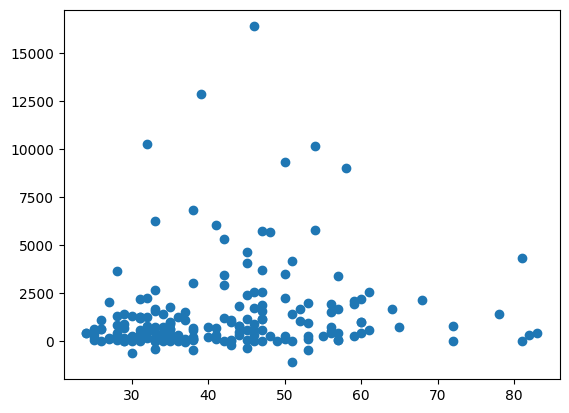

In [18]:
plt.scatter(X.age, X.balance)

In [19]:
# Scaled the data
X_scaled = (X - X.mean()) / X.std()


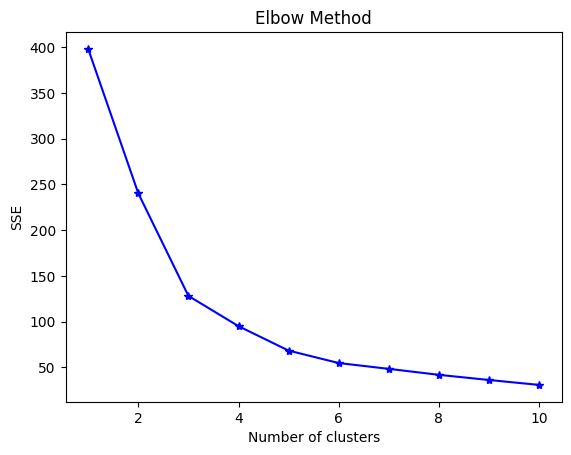

In [28]:
# Task 1: Build Model: using Elbow Method to find the optimal K
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse, 'b-*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=3, n_init=20, random_state=1)
# Fit the model and assign each data point to the cluster
y_pred = kmeans.fit_predict(X_scaled) # fit and then predict

In [34]:
kmeans.cluster_centers_

array([[-0.63857334, -0.32152938],
       [ 0.25667051,  3.00768662],
       [ 1.10659717, -0.05339525]])

In [ ]:
# Task 2: Visualise the Clusters


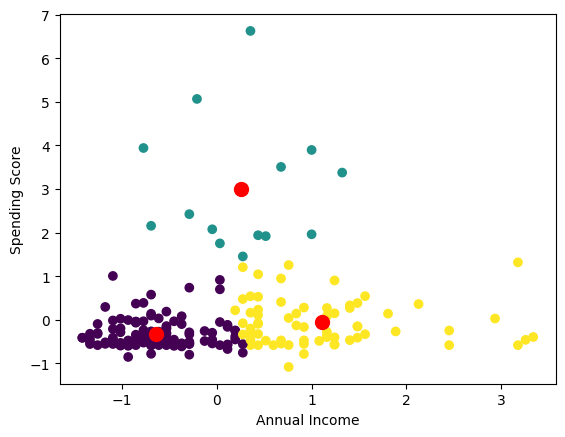

In [35]:
plt.scatter(X_scaled.iloc[:,0], X_scaled.iloc[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [36]:
# Task 3: Intepret the Model
kmeans.inertia_

128.08338364657965